In [49]:
import pandas as pd
import numpy as np

In [50]:
df_zomato = pd.read_csv("zomato.csv")
df_zomato.head()
df_zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

#### dish liked has the most null attributes
#### not a good idea to use it for analysis of all restaurants

In [51]:
df_zomato.shape

(51717, 17)

In [52]:
df_zomato.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [53]:
#url, phone is of no purpose to out analysis
df_zomato = df_zomato.drop(['url','phone'],axis = 1)
df_zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [54]:
#Removing all duplicate valuesdf_zomato.drop_duplicates(inplace = True)

In [55]:
df_zomato.drop_duplicates(inplace = True)
df_zomato.shape

(51674, 15)

# observing all columns and deciding which ones to clean

In [56]:
df_zomato.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51674 entries, 0 to 51716
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      51674 non-null  object
 1   name                         51674 non-null  object
 2   online_order                 51674 non-null  object
 3   book_table                   51674 non-null  object
 4   rate                         43907 non-null  object
 5   votes                        51674 non-null  int64 
 6   location                     51653 non-null  object
 7   rest_type                    51447 non-null  object
 8   dish_liked                   23627 non-null  object
 9   cuisines                     51629 non-null  object
 10  approx_cost(for two people)  51329 non-null  object
 11  reviews_list                 51674 non-null  object
 12  menu_item                    51674 non-null  object
 13  listed_in(type)              51

In [57]:
#online order has no duplicate values and thus we can visualise it

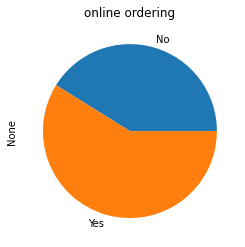

In [58]:
k = df_zomato.groupby(['online_order']).size().plot(kind='pie', title = 'online ordering')


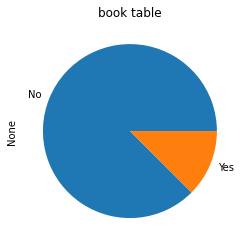

In [59]:
k = df_zomato.groupby(['book_table']).size().plot(kind='pie', title = 'book table')

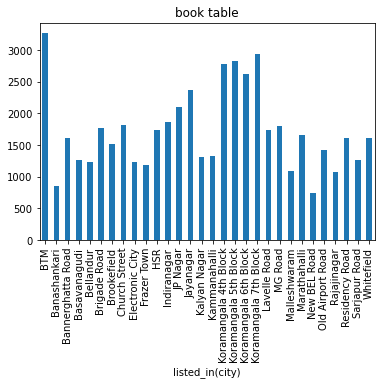

In [60]:
k = df_zomato.groupby(['listed_in(city)']).size().plot(kind='bar', title = 'book table')
#btm layout has max number of restaurants

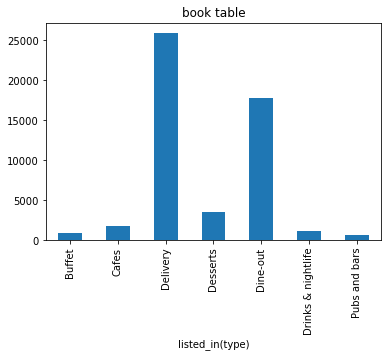

In [61]:
k = df_zomato.groupby(['listed_in(type)']).size().plot(kind='bar', title = 'book table')
#delivery takes the lead in modern bangalore

In [62]:
#now i will try to get the number of high rated restaurants in bangalore grouped by area
#first i will clean the rating column
df_zomato['rate'].isnull().sum()

7767

In [63]:
#7767 vlaues have been left null

In [64]:
#will see number of null values
#convert all null to 0
#then see if 0 and null are equal
#df_zomato['rate'].fillna(0, inplace = True)


In [65]:
#upon working on rate column pbserved that data has characters like /
df_zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [66]:
#I have made new also 0 which is not good because will not be promoted 
#figure out what to do here
def handlerate(value):
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)
    
df_zomato['rate'] = df_zomato['rate'].apply(handlerate)


In [67]:
df_zomato['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51674, dtype: float64

In [68]:
df_zomato['rate'].isnull().sum()

10036

In [69]:
df_high = df_zomato.query('rate > 4')

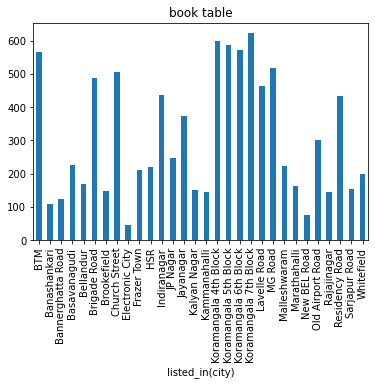

In [70]:
k = df_high.groupby(['listed_in(city)']).size().plot(kind='bar', title = 'book table')

In [71]:
#koramangala 7th block has the highest rated restaurants
#now we can analyse the costs of restaurants in bangalore
df_zomato['approx_cost(for two people)'].unique()


array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [72]:
def handlecomma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',', '')
        return float(value)
    else:
        return float(value)
    
df_zomato['approx_cost(for two people)'] = df_zomato['approx_cost(for two people)'].apply(handlecomma)
df_zomato['approx_cost(for two people)'].unique()
        

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [73]:
df_zomato['approx_cost(for two people)'].min()

40.0

In [74]:
df_zomato['approx_cost(for two people)'].max()

6000.0

# Cost VS Rating Scatterplot for predicting correlation

In [75]:
temp=df_zomato
cost_dist=temp[['rate','approx_cost(for two people)','online_order']].dropna()
# cost_dist['rate']=cost_dist['rate'].apply(lambda x: float(x.split('/')[0]) if len(x)>3 else 0)
# cost_dist['approx_cost(for two people)']=cost_dist['approx_cost(for two people)'].apply(lambda x: int(x.replace(',','')))

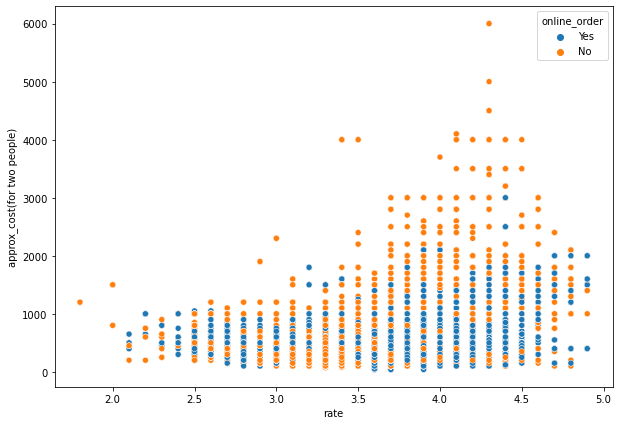

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.scatterplot(x="rate",y='approx_cost(for two people)',hue='online_order',data=cost_dist)
plt.show()

### Explantory variable: Rating
### Response variable: Cost

In [77]:
xarr=cost_dist['rate'].to_numpy()
yarr=cost_dist['approx_cost(for two people)'].to_numpy()

### Calculating persons moment correlation coefficient

In [78]:
R = np.corrcoef(xarr, yarr)
print(R[0,1])

0.3850604365893679


### Since R > 1 we can say that rate and cost are positively correlated

In [79]:
df_zomato['rest_type'].value_counts()

Quick Bites                   19114
Casual Dining                 10322
Cafe                           3730
Delivery                       2600
Dessert Parlor                 2263
                              ...  
Bakery, Food Court                2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 93, dtype: int64

### Cleaning cuisines column

In [80]:
cuisines = df_zomato['cuisines'].value_counts(ascending  = False)


cuisines_lessthan100 = cuisines[cuisines<100]



def handle_cuisines(value):
    if(value in cuisines_lessthan100):
        return 'others'
    else:
        return value
        
df_zomato['cuisines'] = df_zomato['cuisines'].apply(handle_cuisines)
df_zomato['cuisines'].value_counts()

others                                 26440
North Indian                            2912
North Indian, Chinese                   2381
South Indian                            1826
Biryani                                  917
                                       ...  
South Indian, Chinese, North Indian      105
Italian, Pizza                           105
South Indian, Fast Food                  104
North Indian, Mughlai, Chinese           104
North Indian, Chinese, Seafood           102
Name: cuisines, Length: 70, dtype: int64

### Hiasdfdf 

In [81]:
df_zomato['rate'].unique()
#remove null values and find corr

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [82]:
df_zomato['approx_cost(for two people)'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [83]:
#try doing the assignment thing for rate and cost
#number of restaurants and high rating

In [84]:
df_high.groupby(['listed_in(city)']).describe()
#put df_high before you do handle comma

rate                                                   \
                       count      mean       std  min    25%  50%    75%  max   
listed_in(city)                                                                 
BTM                    565.0  4.270088  0.182887  4.1  4.100  4.2  4.400  4.9   
Banashankari           108.0  4.198148  0.130407  4.1  4.100  4.2  4.200  4.7   
Bannerghatta Road      123.0  4.208943  0.145989  4.1  4.100  4.1  4.300  4.7   
Basavanagudi           225.0  4.203556  0.131563  4.1  4.100  4.2  4.200  4.8   
Bellandur              168.0  4.301786  0.185870  4.1  4.175  4.3  4.400  4.9   
Brigade Road           488.0  4.266189  0.147478  4.1  4.100  4.3  4.300  4.9   
Brookefield            147.0  4.276871  0.206427  4.1  4.100  4.2  4.400  4.9   
Church Street          505.0  4.269109  0.146372  4.1  4.200  4.3  4.400  4.9   
Electronic City         47.0  4.261702  0.162257  4.1  4.100  4.2  4.300  4.7   
Frazer Town            211.0  4.243602  0.148626  4.1  4.100  4.2  4.300  4.9   
HSR                    219.0  4.267123  0.173249  4.1  4.100  4.2  4.400  4.7   
Indiranagar            438.0  4.259132  0.166389  4.1  4.100  4.2  4.300  4.9   
JP Nagar               246.0  4.218293  0.150749  4.1  4.100  4.2  4.300  4.9   
Jayanagar              373.0  4.226273  0.151715  4.1  4.100  4.2  4.300  4.9   
Kalyan Nagar           150.0  4.247333  0.161659  4.1  4.100  4.2  4.400  4.8   
Kammanahalli           144.0  4.245139  0.159908  4.1  4.100  4.2  4.325  4.8   
Koramangala 4th Block  598.0  4.275753  0.175073  4.1  4.100  4.2  4.400  4.9   
Koramangala 5th Block  586.0  4.282935  0.178643  4.1  4.100  4.2  4.400  4.9   
Koramangala 6th Block  571.0  4.274256  0.171738  4.1  4.100  4.2  4.400  4.9   
Koramangala 7th Block  623.0  4.277047  0.176705  4.1  4.100  4.2  4.400  4.9   
Lavelle Road           463.0  4.261555  0.147238  4.1  4.100  4.2  4.300  4.9   
MG Road                517.0  4.264603  0.144822  4.1  4.100  4.2  4.300  4.9   
Malleshwaram           222.0  4.250450  0.175862  4.1  4.100  4.2  4.300  4.9   
Marathahalli           164.0  4.306098  0.203254  4.1  4.100  4.2  4.400  4.8   
New BEL Road            77.0  4.248052  0.167497  4.1  4.100  4.2  4.300  4.7   
Old Airport Road       301.0  4.269435  0.166721  4.1  4.100  4.2  4.300  4.9   
Rajajinagar            146.0  4.258219  0.195380  4.1  4.100  4.2  4.300  4.9   
Residency Road         433.0  4.266975  0.143192  4.1  4.200  4.2  4.400  4.9   
Sarjapur Road          153.0  4.275163  0.173691  4.1  4.100  4.2  4.400  4.9   
Whitefield             199.0  4.282915  0.188319  4.1  4.100  4.2  4.400  4.9   

                       votes                                                 \
                       count         mean          std   min     25%    50%   
listed_in(city)                                                               
BTM                    565.0  1278.939823  1808.843065   9.0  278.00  589.0   
Banashankari           108.0   685.296296   883.389175  28.0  198.50  364.0   
Bannerghatta Road      123.0   997.479675  1089.824255   9.0  293.00  583.0   
Basavanagudi           225.0   778.644444   938.727719  30.0  204.00  414.0   
Bellandur              168.0  1533.750000  2566.828255  33.0  248.00  715.0   
Brigade Road           488.0  1036.567623  1251.028825  23.0  221.00  565.5   
Brookefield            147.0   905.891156  1237.873570  31.0  227.50  517.0   
Church Street          505.0  1068.112871  1308.095541  28.0  225.00  552.0   
Electronic City         47.0   659.872340   399.747780  93.0  308.50  800.0   
Frazer Town            211.0   948.549763  1176.412169  34.0  213.50  475.0   
HSR                    219.0   986.922374  1240.090404  57.0  211.50  634.0   
Indiranagar            438.0  1314.561644  1817.492629  41.0  258.25  688.5   
JP Nagar               246.0   922.044715  1053.374268   9.0  239.25  530.0   
Jayanagar              373.0   920.627346  1105.003342   0.0  227.00  468.0   
Kalyan 

In [85]:
df_zomato.groupby(['listed_in(city)']).describe()

rate                                                \
                        count      mean       std  min  25%  50%   75%  max   
listed_in(city)                                                               
BTM                    2604.0  3.707335  0.432821  2.2  3.4  3.7  4.00  4.9   
Banashankari            728.0  3.666758  0.376101  2.5  3.4  3.7  3.90  4.7   
Bannerghatta Road      1217.0  3.555875  0.413645  2.2  3.3  3.6  3.90  4.7   
Basavanagudi           1072.0  3.707276  0.394740  2.5  3.5  3.8  4.00  4.8   
Bellandur               971.0  3.624614  0.467436  2.1  3.3  3.7  3.90  4.9   
Brigade Road           1484.0  3.801146  0.451750  1.8  3.5  3.9  4.10  4.9   
Brookefield            1150.0  3.562348  0.457564  2.1  3.3  3.6  3.90  4.9   
Church Street          1519.0  3.805398  0.451375  1.8  3.5  3.9  4.15  4.9   
Electronic City         826.0  3.493826  0.381192  2.4  3.2  3.5  3.80  4.7   
Frazer Town             957.0  3.714838  0.420661  2.1  3.4  3.8  4.00  4.9   
HSR                    1340.0  3.660821  0.429072  2.3  3.4  3.7  3.90  4.7   
Indiranagar            1554.0  3.745946  0.467046  2.1  3.4  3.8  4.10  4.9   
JP Nagar               1649.0  3.629472  0.412772  2.2  3.3  3.7  3.90  4.9   
Jayanagar              1925.0  3.695429  0.405702  2.3  3.4  3.7  4.00  4.9   
Kalyan Nagar           1006.0  3.647913  0.405203  2.3  3.4  3.7  3.90  4.8   
Kammanahalli           1033.0  3.639109  0.407155  2.3  3.4  3.7  3.90  4.8   
Koramangala 4th Block  2280.0  3.759035  0.429186  2.1  3.5  3.8  4.10  4.9   
Koramangala 5th Block  2277.0  3.760255  0.426419  2.3  3.5  3.8  4.10  4.9   
Koramangala 6th Block  2144.0  3.763153  0.427250  2.1  3.5  3.8  4.10  4.9   
Koramangala 7th Block  2390.0  3.758410  0.428049  2.1  3.5  3.8  4.10  4.9   
Lavelle Road           1456.0  3.776374  0.452156  1.8  3.5  3.8  4.10  4.9   
MG Road                1528.0  3.801898  0.458054  1.8  3.5  3.9  4.20  4.9   
Malleshwaram            947.0  3.715523  0.436207  2.3  3.4  3.7  4.00  4.9   
Marathahalli           1313.0  3.552094  0.461107  2.0  3.2  3.6  3.80  4.8   
New BEL Road            572.0  3.633741  0.411819  2.5  3.3  3.7  3.90  4.7   
Old Airport Road       1207.0  3.718558  0.463479  2.4  3.4  3.8  4.00  4.9   
Rajajinagar             878.0  3.656948  0.411650  2.3  3.4  3.7  3.90  4.9   
Residency Road         1358.0  3.781222  0.458966  1.8  3.5  3.8  4.10  4.9   
Sarjapur Road          1039.0  3.594706  0.451545  2.1  3.3  3.6  3.90  4.9   
Whitefield             1214.0  3.624712  0.447618  2.5  3.3  3.6  3.90  4.9   

                        votes              ...                   \
                        count        mean  ...     75%      max   
listed_in(city)                            ...                    
BTM                    3270.0  301.107951  ...  193.00  14654.0   
Banashankari            862.0  175.838747  ...  163.75   4884.0   
Bannerghatta Road      1617.0  151.418058  ...  108.00   4381.0   
Basavanagudi           1266.0  222.437599  ...  197.00   5060.0   
Bellandur              1227.0  290.833741  ...  162.50  16345.0   
Brigade Road           1769.0  366.567552  ...  289.00   8375.0   
Brookefield            1517.0  178.615030  ...  141.00   6876.0   
Church Street          1815.0  378.748209  ...  291.00   8382.0   
Electronic City        1227.0   89.489813  ...   71.00   2043.0   
Frazer Town            1185.0  239.112236  ...  164.00   7546.0   
HSR                    1741.0  216.202757  ...  178.00   7221.0   
Indiranagar            1859.0  420.506186  ...  340.00  14956.0   
JP Nagar               2096.0  188.860687  ...  158.25   6404.0   
Jayanagar              2366.0  238.253593  ...  194.00   7220.0   
Kalyan Nagar           1309.0  135.025974  ...  123.00   3128.0   
Kammanahalli           1328.0  131.097139  ...  125.00   3248.0   
Koramangala 4th Block  2778.0  357.114831  ...  259.75  14704.0   
Koramangala 5th Block  2836.0  366.823695  ...  234.50  14710.0   
Koramangal

In [105]:
df2=df_zomato
df2.duplicated().sum()

0

In [106]:
#df2.isnull().sum()
df2.dropna(how='any',inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23248 entries, 0 to 51715
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   address                      23248 non-null  object 
 1   name                         23248 non-null  object 
 2   online_order                 23248 non-null  bool   
 3   book_table                   23248 non-null  bool   
 4   rate                         23248 non-null  float64
 5   votes                        23248 non-null  int64  
 6   location                     23248 non-null  object 
 7   rest_type                    23248 non-null  object 
 8   dish_liked                   23248 non-null  object 
 9   cuisines                     23248 non-null  object 
 10  approx_cost(for two people)  23248 non-null  float64
 11  reviews_list                 23248 non-null  object 
 12  menu_item                    23248 non-null  object 
 13  listed_in(type) 

In [111]:
#Adjust the column names
df2.name = df2.name.apply(lambda x:x.title())
df2['approx_cost(for two people)'].unique()


dtype('bool')

In [117]:
#Encode the input Variables 
def Encode(zomato): 
    for column in zomato.columns[~zomato.columns.isin(['rate', 'approx_cost(for two people)', 'votes'])]:
        zomato[column] = zomato[column].factorize()[0] 
    return zomato
                     
zomato_en = Encode(df2.copy())


In [118]:
zomato_en

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,0,0,0,4.1,775,0,0,0,0,800.0,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,1,800.0,1,0,0,0
2,2,2,0,1,3.8,918,0,1,2,1,800.0,2,0,0,0
3,3,3,1,1,3.7,88,0,2,3,2,300.0,3,0,0,0
4,4,4,1,1,3.8,166,1,0,4,1,600.0,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51705,1747,1490,0,0,3.8,128,49,33,1797,1,1200.0,2469,0,6,29
51707,1492,1314,1,1,3.9,77,49,58,55,40,2000.0,2201,0,6,29
51708,1499,1316,1,1,2.8,161,49,15,1569,1,1200.0,2203,0,6,29
51711,4378,845,1,1,2.5,81,49,15,5193,1,800.0,14055,0,6,29


<AxesSubplot:>

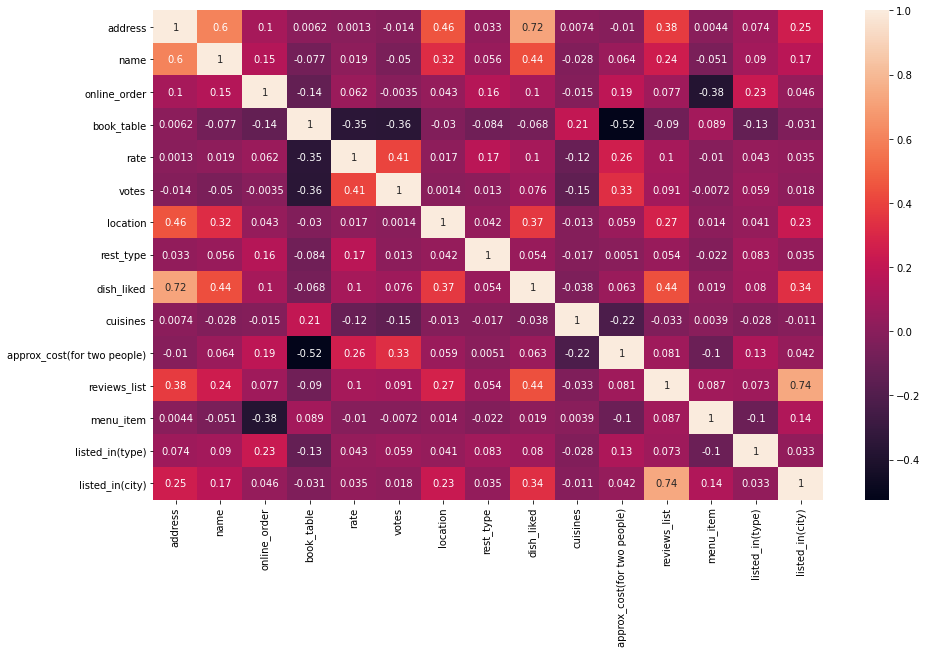

In [120]:
corr=zomato_en.corr(method='kendall')
plt.figure(figsize=(15,9))
sns.heatmap(corr,annot=True)

#### The highest spurious correlation is between review_list and listed_in(city) = 0.74
#### book_table and approx_cost(for 2 people) is negatively correlated= -0.52
#### Restaurants which provide an option of booking table in advance has a high average cost.

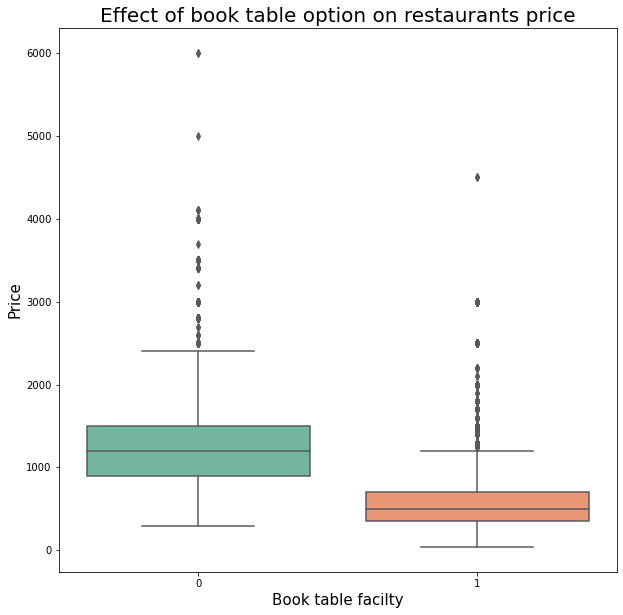

In [124]:
plt_1 = plt.figure(figsize=(10, 10))
sns.boxplot(x='book_table',y='approx_cost(for two people)',palette="Set2",data=zomato_en)
plt.xlabel('Book table facilty',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.title('Effect of book table option on restaurants price',fontsize=20)
plt.show()

#### Green box plot for restaurants that provide online booking facility
#### Orange plot for restaurants that do not provide online booking facility